In [1]:
from physics_sims import SimRunner, Oscillator1DSim, Oscillator1DSRSim, Oscillator1DSRBoostSim
import matplotlib.pyplot as plt
import numpy as np
import spacetimelib as st

pygame 2.5.0 (SDL 2.28.0, Python 3.11.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
x = 0
v = 0.8
m = 0.25
k = 4
run_time = 10
time_delta = 0.001

trajectory = np.array(SimRunner().run_headless(
    Oscillator1DSim(x=x, v=v, m=m, k=k),
    run_time,
    time_delta=time_delta))
trajectory_sr = np.array(SimRunner().run_headless(
    Oscillator1DSRSim(x=x, v=v, m=m, k=k),
    run_time,
    time_delta=time_delta))

v_boost = 0.5

# TODO: In order to handle setting initial x to non-zero, we also need to be
# able to set the initial time! That's because if we boost the initial event
# (t=0, x), we get a nonzero time coord in the other frame. So to run identical
# experiments in two different frames where the initial space coord is not x=0,
# we need to have the flexibility to start the sim at any time coord. And that's
# just a good feature to have anyway, you may not always want to be locked in at
# starting with t=0. You want to be able to have the freedom to explore the whole
# space of solutions.
trajectory_sr_boost = np.array(SimRunner().run_headless(
    Oscillator1DSRBoostSim(
        x=st.boost([0, x], v_boost)[1],
        v=st.boost_velocity_s(v, v_boost),
        m=m,
        k=k,
        v_boost=v_boost
    ),
    run_time,
    time_delta=time_delta
))

w_boost_check = st.Worldline(trajectory_sr[:, [0, 1]]).boost(v_boost)
# Cut the worldline down to only the time range we want
vertices = w_boost_check._vertices
vertices = vertices[np.where(vertices[:, 0] <= run_time)]
w_boost_check._vertices = vertices

(-5.254758113101307,
 0.5526479877215001,
 -0.5000499999999949,
 10.501049999999891)

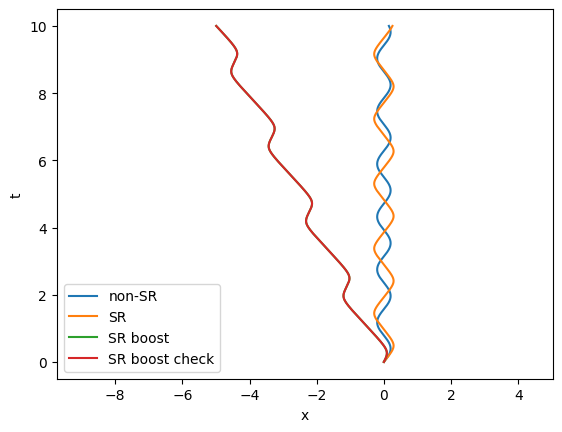

In [3]:
plt.plot(*trajectory[:, [1, 0]].T, label='non-SR')
plt.plot(*trajectory_sr[:, [1, 0]].T, label='SR')
plt.plot(*trajectory_sr_boost[:, [1, 0]].T, label='SR boost')
plt.plot(*w_boost_check.plot(), label='SR boost check')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.axis('equal')

(-0.8900000115811233,
 1.090000000551482,
 -0.5000499999999949,
 10.501049999999891)

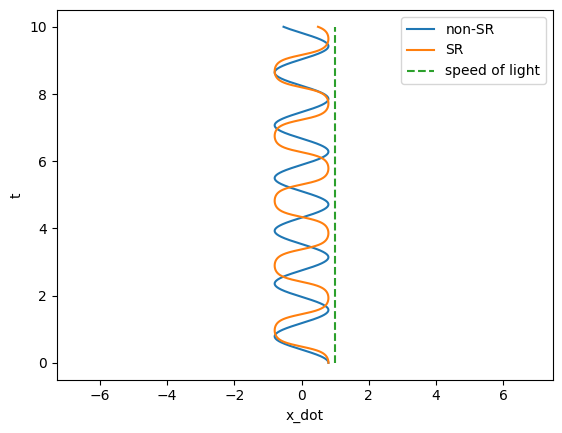

In [4]:
plt.plot(*trajectory[:, [2, 0]].T, label='non-SR')
plt.plot(*trajectory_sr[:, [2, 0]].T, label='SR')
plt.plot([1, 1], [0, run_time], label='speed of light', linestyle='dashed')
plt.legend()
plt.xlabel('x_dot')
plt.ylabel('t')
plt.axis('equal')


(0.07566666785931252,
 0.17100002740654935,
 -0.5000499999999949,
 10.501049999999891)

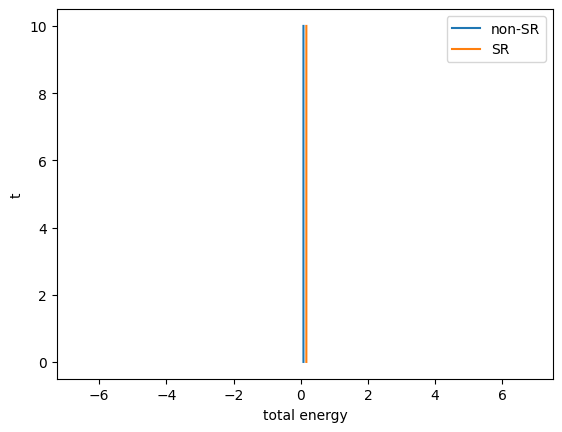

In [5]:
plt.plot(*trajectory[:, [-1, 0]].T, label='non-SR')
plt.plot(*trajectory_sr[:, [-1, 0]].T, label='SR')
plt.legend()
plt.xlabel('total energy')
plt.ylabel('t')
plt.axis('equal')

(-0.008333334644083748,
 0.17500002752575872,
 -0.5000499999999949,
 10.501049999999891)

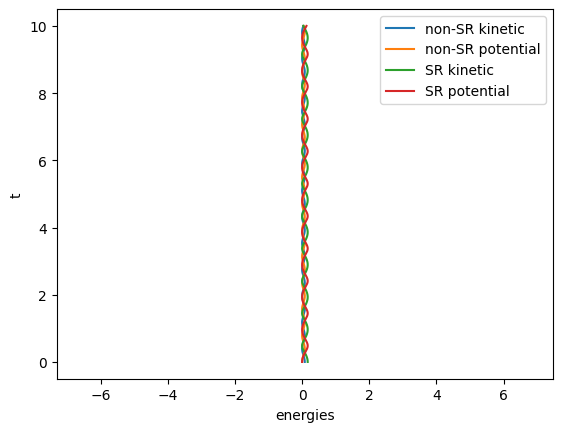

In [6]:
plt.plot(*trajectory[:, [-3, 0]].T, label='non-SR kinetic')
plt.plot(*trajectory[:, [-2, 0]].T, label='non-SR potential')
plt.plot(*trajectory_sr[:, [-3, 0]].T, label='SR kinetic')
plt.plot(*trajectory_sr[:, [-2, 0]].T, label='SR potential')
plt.legend()
plt.xlabel('energies')
plt.ylabel('t')
plt.axis('equal')